<span style="font-size: 20px; font-weight: bold;">Importing necessary libraries and seeding for reproducibility of the solution</span>


In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.cluster import KMeans

np.random.seed(0)

<span style="font-size: 20px; font-weight: bold;">Reading the Data File</span>


In [2]:
df = pd.read_excel("Indigo_Fleet.xlsx",index_col=False)
orgCounter = {}
countList = []

for i, r in df.iterrows():
    if r['ORIGIN'] not in orgCounter:
        orgCounter[r['ORIGIN']] = 1
        
    elif r['ORIGIN'] in orgCounter:
        orgCounter[r['ORIGIN']] += 1
        
for key, value in orgCounter.items():
    if [0,value] not in countList:
        countList.append([0,value])

<span style="font-size: 20px; font-weight: bold;">Defining the number of clusters and deploying K means clustering algorithm with K = 3</span>


In [3]:
clusters = 3
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(countList)
print(countList)
print (kmeans.labels_)
labelsList = np.array(kmeans.labels_)

C:\Users\Dhawal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dhawal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[0, 8], [0, 27], [0, 2], [0, 4], [0, 1], [0, 9], [0, 90], [0, 7], [0, 14], [0, 6], [0, 17], [0, 142], [0, 3], [0, 22], [0, 20], [0, 104], [0, 12], [0, 21], [0, 87], [0, 5], [0, 23], [0, 108], [0, 16], [0, 10], [0, 13], [0, 15]]
[0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 1 0 0 1 0 0 1 0 0 0 0]


In [4]:
clusterOrg = {}
clusterRank = {}
clusterCount = {}
clusterAvg = {}
sortedList = []
for i in range(clusters):
    if i not in clusterOrg and i+1 not in clusterRank and i not in clusterCount and i not in clusterAvg:
        clusterOrg[i] = []
        clusterRank[i+1] = []
        clusterCount[i] = []
        clusterAvg[i] = 0
        
        
cc = 0
for i in labelsList:
    for key, value in orgCounter.items():
        if value == countList[cc][1]:
            clusterOrg[i].append(key)
            clusterCount[i].append(value)
    cc+=1

for key, value in clusterCount.items():
    clusterAvg[key] = sum(value)/len(value)
    sortedList.append(sum(value)/len(value))

sortedList = sorted(sortedList)
print(orgCounter)
print(clusterOrg)
print(clusterAvg)
print(sortedList)

{'Agartala (IXA)': 8, 'Ahmedabad (AMD)': 27, 'Aizawl (AJL)': 2, 'Amritsar (ATQ)': 4, 'Aurangabad (IXU)': 1, 'Bagdogra (IXB)': 9, 'Belgaum (IXG)': 1, 'Bengaluru (BLR)': 90, 'Bhopal (BHO)': 7, 'Bhubaneshwar (BBI)': 14, 'Chandigarh (IXC)': 6, 'Chennai (MAA)': 90, 'Coimbatore (CJB)': 17, 'Dehradun (DED)': 1, 'Delhi (DEL)': 142, 'Dibrugarh (DIB)': 3, 'Dimapur (DMU)': 1, 'GAYA (GAY)': 1, 'Goa (GOI)': 22, 'Gorakhpur (GOP)': 4, 'Guwahati (GAU)': 20, 'Hubli (HBX)': 4, 'Hyderabad (HYD)': 104, 'Imphal (IMF)': 2, 'Indore (IDR)': 12, 'Jaipur (JAI)': 14, 'Jammu (IXJ)': 2, 'Jodhpur (JDH)': 6, 'Kannur (CNN)': 7, 'Kochi (COK)': 21, 'Kolhapur (KLH)': 2, 'Kolkata (CCU)': 87, 'Kozhikode (CCJ)': 5, 'Lucknow (LKO)': 23, 'Madurai (IXM)': 9, 'Mangalore (IXE)': 8, 'Mumbai (BOM)': 108, 'Nagpur (NAG)': 12, 'Patna (PAT)': 16, 'Port Blair (IXZ)': 2, 'Prayagraj (IXD)': 5, 'Pune (PNQ)': 17, 'Raipur (RPR)': 14, 'Rajahmundry (RJA)': 7, 'Ranchi (IXR)': 10, 'Shirdi (SAG)': 2, 'Silchar (IXS)': 1, 'Srinagar (SXR)': 3, 'Su

In [5]:
rr = 1
for s in sortedList:
    cc=0
    for key, value in clusterAvg.items():
        if value == s:
            clusterRank[rr] = clusterOrg[cc]
        cc+=1
    rr+=1
            
print(sortedList)
print(clusterRank)

#Keep track of max and min count of each cluster

[8.23076923076923, 95.8, 142.0]
{1: ['Agartala (IXA)', 'Mangalore (IXE)', 'Vijayawada (VGA)', 'Ahmedabad (AMD)', 'Aizawl (AJL)', 'Imphal (IMF)', 'Jammu (IXJ)', 'Kolhapur (KLH)', 'Port Blair (IXZ)', 'Shirdi (SAG)', 'Tuticorin (TCR)', 'Amritsar (ATQ)', 'Gorakhpur (GOP)', 'Hubli (HBX)', 'Surat (STV)', 'Tirupati (TIR)', 'Aurangabad (IXU)', 'Belgaum (IXG)', 'Dehradun (DED)', 'Dimapur (DMU)', 'GAYA (GAY)', 'Silchar (IXS)', 'Bagdogra (IXB)', 'Madurai (IXM)', 'Varanasi (VNS)', 'Bhopal (BHO)', 'Kannur (CNN)', 'Rajahmundry (RJA)', 'Tiruchirappalli (TRZ)', 'Udaipur (UDR)', 'Vadodara (BDQ)', 'Bhubaneshwar (BBI)', 'Jaipur (JAI)', 'Raipur (RPR)', 'Chandigarh (IXC)', 'Jodhpur (JDH)', 'Coimbatore (CJB)', 'Pune (PNQ)', 'Dibrugarh (DIB)', 'Srinagar (SXR)', 'Goa (GOI)', 'Guwahati (GAU)', 'Indore (IDR)', 'Nagpur (NAG)', 'Kochi (COK)', 'Kozhikode (CCJ)', 'Prayagraj (IXD)', 'Lucknow (LKO)', 'Patna (PAT)', 'Ranchi (IXR)', 'Thiruvananthapuram (TRV)', 'Visakhapatnam (VTZ)'], 2: ['Bengaluru (BLR)', 'Chennai (MA

<span style="font-size: 20px; font-weight: bold;">Systematic scheme for Delay Data Generation for Dynamic Programming Approach and the distribution scheme defined here is also used in the Reinforcement Learning Framework to capture uncertainties in the occurrence of delay. For each cluster shape and scale is defined by the mean and variance as discussed in the Section 7.2.2 of the paper.</span>


In [6]:
maxDelay = 3000
maxRangeStep = {}
countStep = 0
for i in range(clusters):
    if i < clusters-1:
        if i not in maxRangeStep:
            maxRangeStep[i] = (countStep, countStep + math.floor(maxDelay/clusters))
            countStep+=math.floor(maxDelay/clusters)
    if i == clusters-1:
        maxRangeStep[i] = (countStep, maxDelay)        
        
print(maxRangeStep)

{0: (0, 1000), 1: (1000, 2000), 2: (2000, 3000)}


In [7]:
#logic: If the flight leg belongs to the first cluster,
#then the flight leg will be assigned the priority majorly from the first range
#occassionaly from any other range.
#hence need to define a skewed normal distribution which will differ for each cluster,
#the mean and the range will differ
#Create a distribution

clusterFlight = {}
clusterFlightabs = {}

for c in range(clusters):
    if c+1 not in clusterFlight and c+1 not in clusterFlightabs:
        clusterFlight[c+1] = []
        clusterFlightabs[c+1] = []

for key, value in clusterRank.items():
    for i, r in df.iterrows():
        if r['ORIGIN'] in value:
            flightLeg = str(r['ORIGIN']) + str("-") + str(r["DEST"])
            clusterFlightabs[key].append(flightLeg)
            if flightLeg not in clusterFlight[key]:
                clusterFlight[key].append(flightLeg)
            
print(clusterFlightabs)

{1: ['Agartala (IXA)-Bengaluru (BLR)', 'Agartala (IXA)-Delhi (DEL)', 'Agartala (IXA)-Kolkata (CCU)', 'Agartala (IXA)-Kolkata (CCU)', 'Agartala (IXA)-Kolkata (CCU)', 'Agartala (IXA)-Kolkata (CCU)', 'Agartala (IXA)-Kolkata (CCU)', 'Agartala (IXA)-Kolkata (CCU)', 'Ahmedabad (AMD)-Bagdogra (IXB)', 'Ahmedabad (AMD)-Bengaluru (BLR)', 'Ahmedabad (AMD)-Chandigarh (IXC)', 'Ahmedabad (AMD)-Chennai (MAA)', 'Ahmedabad (AMD)-Delhi (DEL)', 'Ahmedabad (AMD)-Delhi (DEL)', 'Ahmedabad (AMD)-Delhi (DEL)', 'Ahmedabad (AMD)-Delhi (DEL)', 'Ahmedabad (AMD)-Delhi (DEL)', 'Ahmedabad (AMD)-Delhi (DEL)', 'Ahmedabad (AMD)-Delhi (DEL)', 'Ahmedabad (AMD)-Hyderabad (HYD)', 'Ahmedabad (AMD)-Hyderabad (HYD)', 'Ahmedabad (AMD)-Hyderabad (HYD)', 'Ahmedabad (AMD)-Hyderabad (HYD)', 'Ahmedabad (AMD)-Jodhpur (JDH)', 'Ahmedabad (AMD)-Kochi (COK)', 'Ahmedabad (AMD)-Kolkata (CCU)', 'Ahmedabad (AMD)-Kolkata (CCU)', 'Ahmedabad (AMD)-Lucknow (LKO)', 'Ahmedabad (AMD)-Mumbai (BOM)', 'Ahmedabad (AMD)-Mumbai (BOM)', 'Ahmedabad (AMD)-

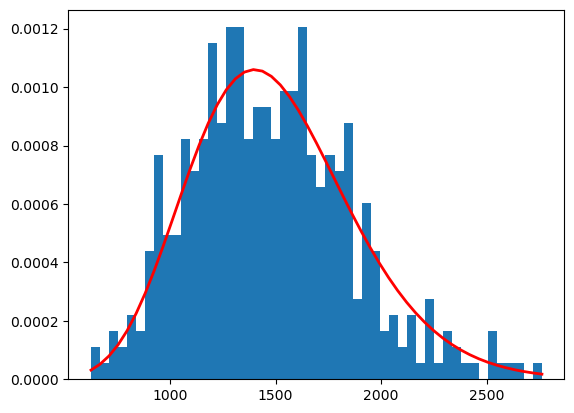

[2251.28554155 1625.31470379 2304.44532715 1123.33080711 1427.49093016
 1629.60057114 1777.85414744 1513.75988608 1643.30506578 1598.20141885
 2116.489922   1389.49167955  690.11228403 1731.49415656 2518.95126904
  977.21797177 2135.47279801 2104.42339769 1152.26602998  831.34847084
 1990.08688169 1977.01477569 1100.63531625  987.28704615 1280.01489491
 1305.21264746  931.3476994  1386.69264492 1149.76334722 1619.88483846
 1455.90014787 1636.8968903  1236.90511908 1332.08725545 1176.77561073
  899.91066681  926.74333337 1651.13354298 1763.98100882 1516.61998902
 1626.21073174 1219.72594544 1350.55738425 1488.281678   1064.17098771
 1839.41351643 1652.32750675  953.49196795 1966.00629674 1398.83416577
 1317.61665893 1986.40656707 1607.42160829 1754.24625731 1515.80916399
 1626.0662094  1031.92910233 1870.12267234 1313.89691159 1198.63236896
 2304.44582936 1841.73856613 1366.40476709 1795.9483407  1714.63488968
 1848.95227087 1615.60145885 1084.63251713 1583.87371294 2035.5338432
 1306.2

In [8]:
shape, scale = 15, 100.
fcount = len(clusterFlightabs[1])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))

plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)
            
# print(flightSorted)

flag = []
for i in range(len(df)):
    flag.append(0)
    
df['Flag'] = flag

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[1]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1
                        
# for i, r in df.iterrows():
#     if r["ARR_DELAY_NEW"] > 0:
#         print(r["ARR_DELAY_NEW"])
# df.drop('Flag', inplace=True, axis=1)                       
# df.to_excel("testDataDay1_AA_150_revised_withdelay.xlsx")

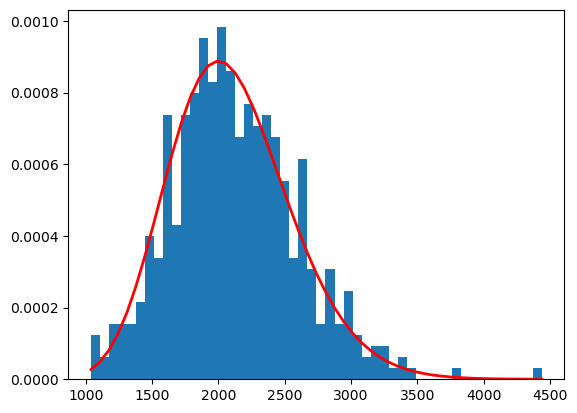

[2896.54552931 1800.84683472 1835.73539569 1616.25764113 2965.67519516
 1739.57258777 2805.15491863 1264.46340968 2626.12023396 1605.89074257
 1989.26663212 1692.72360391 1605.61106905 2631.9668336  2503.84823566
 1771.16222777 1947.25959479 2317.26690657 1769.74964414 1705.75156935
 1599.20698516 2175.07564778 1980.67800707 1688.83823834 2089.85033416
 1790.39945944 2121.77434009 2360.14047916 2206.15135404 1910.63214302
 1973.14921658 2344.98448156 2199.23404166 2495.73801745 2308.72751449
 1934.09225615 2624.97903862 2837.43942557 3227.97261718 1494.59889686
 2140.27755586 2491.11541053 2213.50269133 1276.93455413 2173.04383797
 2432.79741559 1967.23365327 1976.73770066 2158.13203258 2121.24219297
 2122.5435079  2623.83528246 1900.71142084 1789.68287085 1914.2567591
 2086.54948554 1869.99061685 2674.81176441 1607.80477937 2144.62925275
 2421.93979362 1662.72005478 1503.17835894 2213.27638618 2230.1581687
 1525.65647724 2049.125318   1415.71407893 2055.49583709 1733.92321399
 1331.86

In [9]:
shape, scale = 21., 100.
fcount = len(clusterFlightabs[2])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)
            
# print(flightSorted)

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[2]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1

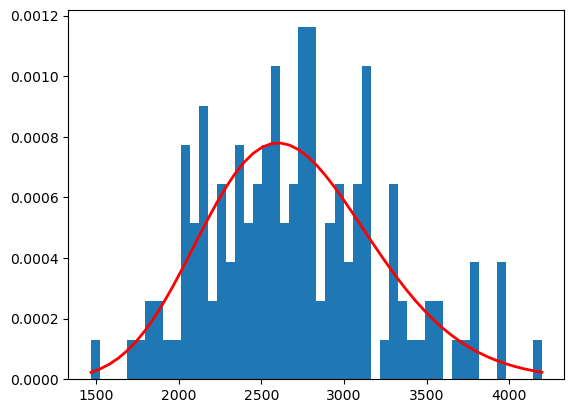

[3596.49881484 2363.06767131 2403.11311702 2150.07748393 3672.97228371
 2292.57930054 3495.19637818 1738.01615432 3296.03572505 2138.05628292
 2578.61249587 2238.54517063 2137.73188831 3302.55504969 3159.44240584
 2328.94466529 2530.70820296 2950.02394182 2327.31969236 2253.58371841
 2130.3024316  2789.55934187 2568.82484601 2234.05829287 2692.98982008
 2351.06359838 2729.19899966 2998.25560183 2824.69675865 2488.87027899
 2560.24217063 2981.21325927 2816.87870381 3150.36480913 2940.40917593
 2515.67516854 3294.76309504 3531.00929313 3962.00532956 2008.57248334
 2750.16612252 3145.18982694 2833.00325303 1752.78541469 2787.26060052
 3079.84026419 2553.49668563 2564.33330249 2770.38455377 2728.59577792
 2730.07087788 3293.48756801 2477.52706983 2350.24002235 2493.01341145
 2689.24340236 2442.370487   3350.29721409 2140.27625297 2755.09521137
 3067.66045938 2203.87381498 2018.58346263 2832.74757634 2851.81480933
 2044.78853209 2646.73426146 1916.28395382 2653.97471443 2286.07004909
 1817.

In [10]:
shape, scale = 27., 100.
fcount = len(clusterFlightabs[3])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)
            
# print(flightSorted)

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[3]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1
# df.drop('Flag', inplace=True, axis=1)                       
# df.to_excel("testDataDay1_AA_150_revised_withdelay.xlsx")

In [11]:
airport_res = []
airport_res.append(('ORIGIN', 'COUNT', 'CLUSTER_ID'))
print(ocount)
ffcounter = 0
for f in flightSorted:
    for key, value in clusterRank.items():
        if f in value:
            airport_res.append((f, ocount[ffcounter], key))
        
    ffcounter+=1
    
print(airport_res)

pd.DataFrame(airport_res).to_excel('Indigo_airport_res_full_3.xlsx', header=False, index=False)

[142, 108, 104, 90, 90, 87, 27, 23, 22, 21, 20, 17, 17, 16, 15, 14, 14, 14, 13, 12, 12, 10, 9, 9, 9, 8, 8, 8, 7, 7, 7, 7, 7, 7, 6, 6, 5, 5, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]
[('ORIGIN', 'COUNT', 'CLUSTER_ID'), ('Delhi (DEL)', 142, 3), ('Mumbai (BOM)', 108, 2), ('Hyderabad (HYD)', 104, 2), ('Bengaluru (BLR)', 90, 2), ('Chennai (MAA)', 90, 2), ('Kolkata (CCU)', 87, 2), ('Ahmedabad (AMD)', 27, 1), ('Lucknow (LKO)', 23, 1), ('Goa (GOI)', 22, 1), ('Kochi (COK)', 21, 1), ('Guwahati (GAU)', 20, 1), ('Coimbatore (CJB)', 17, 1), ('Pune (PNQ)', 17, 1), ('Patna (PAT)', 16, 1), ('Visakhapatnam (VTZ)', 15, 1), ('Bhubaneshwar (BBI)', 14, 1), ('Jaipur (JAI)', 14, 1), ('Raipur (RPR)', 14, 1), ('Thiruvananthapuram (TRV)', 13, 1), ('Indore (IDR)', 12, 1), ('Nagpur (NAG)', 12, 1), ('Ranchi (IXR)', 10, 1), ('Bagdogra (IXB)', 9, 1), ('Madurai (IXM)', 9, 1), ('Varanasi (VNS)', 9, 1), ('Agartala (IXA)', 8, 1), ('Mangalore (IXE)', 8, 1), ('Vijayawada (VGA)', 8, 1), ('Bhopal (BHO)', 7

In [12]:
adf = pd.read_excel("Indigo_airport_res_full_3.xlsx",index_col=False)
cid = []

list_zeroes = list(np.zeros(len(df)))
df["CLUSTER_ID"] = list_zeroes

for i, r in adf.iterrows():
    for ii, rr in df.iterrows():
        if r["ORIGIN"] == rr["ORIGIN"]:
            df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
#             cid.insert(ii, r["CLUSTER_ID"])

# df["CLUSTER_ID"] = cid
df.to_excel('Indigo_Fleet_cluster3.xlsx')       

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_2120\1973812319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii